### VGGNet 16 

In [1]:
import keras,os
from keras.models import Sequential
import numpy as np
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.initializers import HeNormal
from keras import regularizers
from sklearn.metrics import recall_score,precision_score
from keras.layers import LeakyReLU
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.datasets import cifar100
from keras.utils import to_categorical
%load_ext tensorboard

In [2]:
(x_train,y_train),(x_test,y_test) = cifar100.load_data()

169009152/169001437 [==============================] - 4s 0us/step


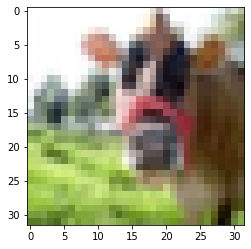

In [3]:
plt.imshow(x_train[0])

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
def normalize(X_train,X_test):
    #this function normalize inputs for zero mean and unit variance
    # it is used when training a model.
    # Input: training set and test set
    # Output: normalized training set and test set according to the trianing set statistics.
    mean = np.mean(X_train,axis=(0,1,2,3))
    std = np.std(X_train, axis=(0, 1, 2, 3))
    print(mean)
    print(std)
    X_train = (X_train-mean)/(std+1e-7)
    X_test = (X_test-mean)/(std+1e-7)
    return X_train, X_test


In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train, x_test = normalize(x_train, x_test)

121.93584
68.38902


In [7]:
y_train = keras.utils.to_categorical(y_train, 100)
y_test = keras.utils.to_categorical(y_test, 100)

# Building Model

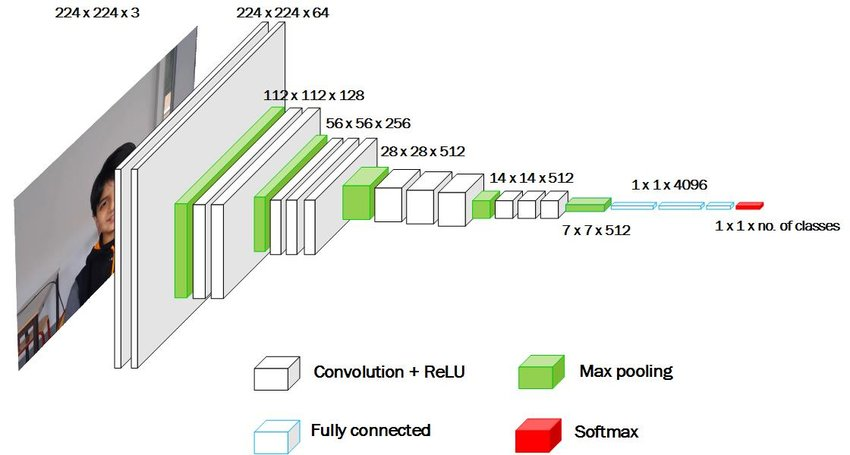

In [8]:
initializer = HeNormal() 
weight_decay  = 0.0005

In [9]:
model = Sequential()

model.add(Conv2D(input_shape = (32,32,3),filters=32,kernel_size=(3,3),padding="same" ,kernel_initializer=initializer, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.1))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same" ,kernel_initializer=initializer , kernel_regularizer=regularizers.l2(weight_decay)))
model.add(LeakyReLU(alpha=0.1)) 

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same" ,kernel_initializer=initializer , kernel_regularizer=regularizers.l2(weight_decay)))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.1))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same" ,kernel_initializer=initializer , kernel_regularizer=regularizers.l2(weight_decay)))
model.add(LeakyReLU(alpha=0.1)) 

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same" ,kernel_initializer=initializer , kernel_regularizer=regularizers.l2(weight_decay)))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.1))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same" ,kernel_initializer=initializer, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.1))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same" ,kernel_initializer=initializer , kernel_regularizer=regularizers.l2(weight_decay)))
model.add(LeakyReLU(alpha=0.1)) 

model.add(MaxPool2D(pool_size=(2,2),strides=(1,1)))

model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same" ,kernel_initializer=initializer , kernel_regularizer=regularizers.l2(weight_decay)))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.1))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same" ,kernel_initializer=initializer , kernel_regularizer=regularizers.l2(weight_decay)))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.1))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same" ,kernel_initializer=initializer, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(LeakyReLU(alpha=0.1)) 

model.add(MaxPool2D(pool_size=(2,2),strides=(1,1)))

model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same" ,kernel_initializer=initializer , kernel_regularizer=regularizers.l2(weight_decay)))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.1))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same" ,kernel_initializer=initializer , kernel_regularizer=regularizers.l2(weight_decay)))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.1))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same" ,kernel_initializer=initializer , kernel_regularizer=regularizers.l2(weight_decay)))
model.add(LeakyReLU(alpha=0.1)) 

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


In [10]:
model.add(Flatten())

model.add(Dense(units=4096 , kernel_initializer=initializer, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.1))
model.add(Dense(units=4096 , kernel_initializer=initializer, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.1))
model.add(Dense(units=100,activation="softmax"))

In [11]:
from keras.optimizers import Adam,SGD
from keras.losses import categorical_crossentropy

opt = SGD()

model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [13]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard

checkp = ModelCheckpoint("Vgg_sgd_dropout.h5",monitor='val_accuracy',save_best_only = True,save_weights_only= True,mode = 'auto' )

early = EarlyStopping(monitor='val_accuracy',min_delta = 0, patience = 40,verbose =1,mode = 'auto')
early1 = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 20,verbose =1,mode = 'auto')
tensor_board = TensorBoard(log_dir='tb_logs/tensorboard',histogram_freq=1)


In [14]:
# #datagen = ImageDataGenerator(rotation_range=15,horizontal_flip=True,width_shift_range=0.1,height_shift_range=0.1)
# datagen = ImageDataGenerator(
#     featurewise_center=False,  # set input mean to 0 over the dataset
#     samplewise_center=False,  # set each sample mean to 0
#     featurewise_std_normalization=False,  # divide inputs by std of the dataset
#     samplewise_std_normalization=False,  # divide each input by its std
#     zca_whitening=False,  # apply ZCA whitening
#     rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
#     width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#     height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#     horizontal_flip=True,  # randomly flip images
#     vertical_flip=False)  # randomly flip images
# # (std, mean, and principal components if ZCA whitening is applied).
# datagen.fit(x_train)

In [ ]:
#Loading the saved weights

filename = '../weights/Vgg_sgd_dropout.h5'
model.load_weights(filename)
test_acc = model.evaluate(x_test,y_test)
test_acc
# Test the model
y_true = y_test.argmax(-1)
y_pred = model.predict(x_test).argmax(-1)
# generate confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
confusion_matrix(y_true, y_pred)
# calculate prec, recall, accuracy
print("Prec: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))

In [15]:
output = model.fit(x=x_train,y= y_train, batch_size=128, epochs=100,validation_data=(x_test,y_test),callbacks = [checkp,early,tensor_board,early1])
#output = model.fit_generator(datagen.flow(x_train,y_train,batch_size = 128), epochs = 100, validation_data = (x_test,y_test),callbacks = [checkp,early,tensor_board])

Epoch 1/100
  1/391 [..............................] - ETA: 0s - loss: 31.1808 - accuracy: 0.0078WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
391/391 [==============================] - 25s 63ms/step - loss: 14.9198 - accuracy: 0.0139 - val_loss: 14.7905 - val_accuracy: 0.0269
Epoch 2/100
391/391 [==============================] - 24s 63ms/step - loss: 14.6379 - accuracy: 0.0237 - val_loss: 14.5379 - val_accuracy: 0.0383
Epoch 3/100
391/391 [==============================] - 25s 64ms/step - loss: 14.3483 - accuracy: 0.0433 - val_loss: 14.2905 - val_accuracy: 0.0715
Epoch 4/100
391/391 [==============================] - 26s 66ms/step - loss: 14.0667 - accuracy: 0.0755 - val_loss: 14.0286 - val_accuracy: 0.1014
Epoch 5/100
391/391 [============================

In [16]:
test_acc = model.evaluate(x_test,y_test)
test_acc

313/313 [==============================] - 2s 8ms/step - loss: 8.7961 - accuracy: 0.4568


[8.796073913574219, 0.45680001378059387]

In [17]:
# Test the model
y_true = y_test.argmax(-1)
y_pred = model.predict(x_test).argmax(-1)
# generate confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
confusion_matrix(y_true, y_pred)
# calculate prec, recall, accuracy
print("Prec: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))

Prec: 0.4624418979528219
Recall: 0.4568
Accuracy: 0.4568


Text(0.5, 1.0, 'Loss')

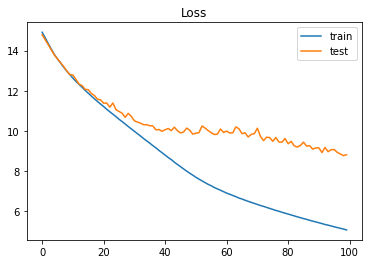

In [18]:
plt.plot(output.history["loss"])
plt.plot(output.history["val_loss"])
plt.legend(['train','test'])
plt.title('Loss')


Text(0.5, 1.0, 'Accuracy')

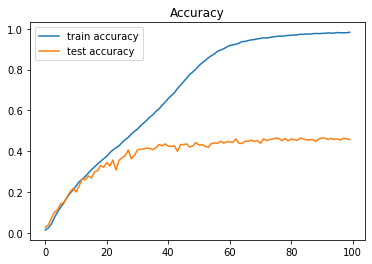

In [19]:
plt.plot(output.history["accuracy"])
plt.plot(output.history["val_accuracy"])
plt.legend(['train accuracy','test accuracy'])
plt.title('Accuracy')

(100.0, 0.0)

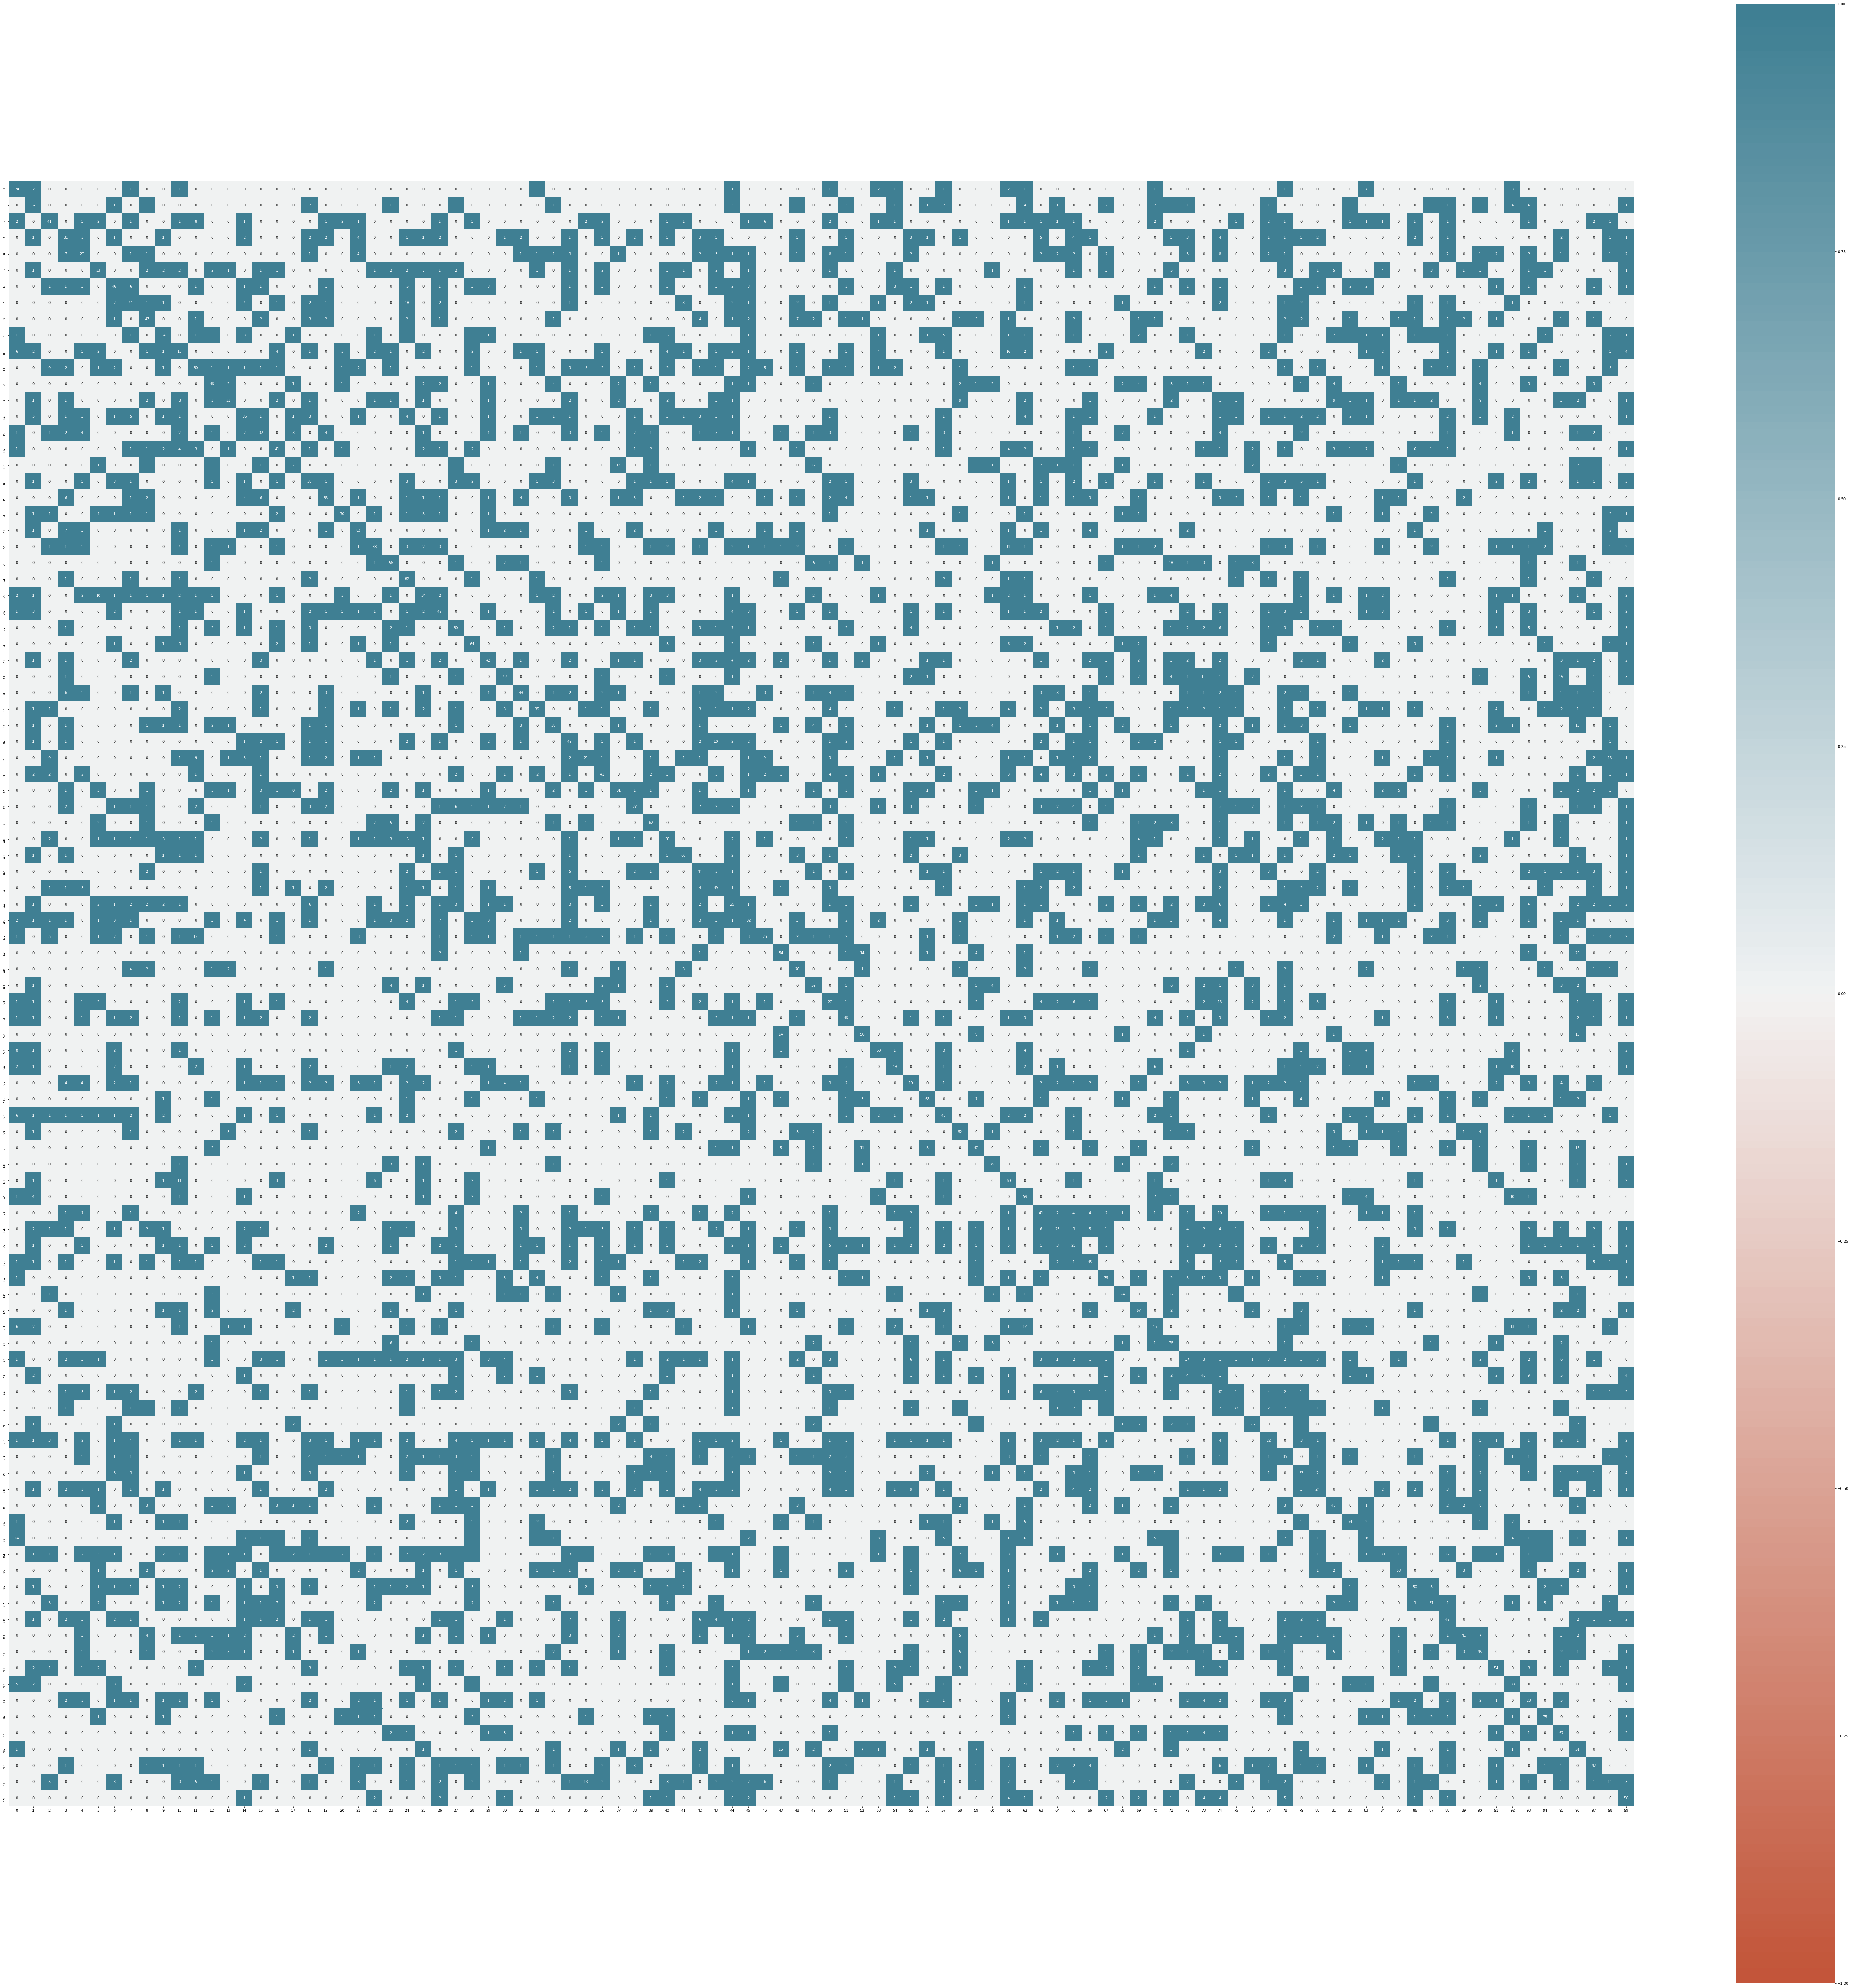

In [21]:
import seaborn as sns 

plt.figure(figsize = (100,100))  #This is the size of the image
heatM = sns.heatmap(confusion_matrix(y_true, y_pred), vmin = -1, vmax = 1,center = 0, cmap = sns.diverging_palette(20, 220, n = 200),  square = True, annot = True) #this are the caracteristics of the heatmap
heatM.set_ylim([100,0]) # This is the limit in y axis (number of features)
